# Dataset: 38 - Regresion Lineal Multivariable 

In [416]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

import pandas as pd

## 2 Regresión lineal con multiples variables

Se implementa la regresion lineal multivariable para predecir el precio de las casas. El archivo `Datasets/ex1data2.txt` contiene un conjunto de entrenamiento de precios de casas en Portland, Oregon. La primera columna es el tamaño de la casa en metros cuadrados, la segunda columna es el numero de cuartos, y la tercera columna es el precio de la casa. 

<a id="section4"></a>
### 2.1 Normalización de caracteristicas

Al visualizar los datos se puede observar que las caracteristicas tienen diferentes magnitudes, por lo cual se debe transformar cada valor en una escala de valores similares, esto con el fin de que el descenso por el gradiente pueda converger mas rapidamente.

In [417]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [418]:
data = pd.read_csv('/content/drive/MyDrive/datasets/Car.csv')

In [419]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Price_in_thousands  155 non-null    float64
 1   Engine_size         156 non-null    float64
 2   Horsepower          156 non-null    float64
 3   Fuel_efficiency     154 non-null    float64
 4   sales               157 non-null    float64
dtypes: float64(5)
memory usage: 6.3 KB


#RELLENAR LAS COLUMNAS CON VALORES NULL CON EL PROMEDIO DE CADA COLUMNAS

In [420]:


# Rellenar los valores nulos con valores similares de la columna original
# Para no perder los valores null rellenamos con valos promedio de cada columnas
data_filled = data.copy()
data_filled['Price_in_thousands'] = data_filled['Price_in_thousands'].fillna(data_filled['Price_in_thousands'].mean())
data_filled['Engine_size'] = data_filled['Engine_size'].fillna(data_filled['Engine_size'].mean())
data_filled['Horsepower'] = data_filled['Horsepower'].fillna(data_filled['Horsepower'].mean())
data_filled['Fuel_efficiency'] = data_filled['Fuel_efficiency'].fillna(data_filled['Fuel_efficiency'].mean())
data_filled['sales'] = data_filled['sales'].fillna(data_filled['sales'].mean())
data = data_filled

In [421]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Price_in_thousands  157 non-null    float64
 1   Engine_size         157 non-null    float64
 2   Horsepower          157 non-null    float64
 3   Fuel_efficiency     157 non-null    float64
 4   sales               157 non-null    float64
dtypes: float64(5)
memory usage: 6.3 KB


#El siguiente codigo es para realizar la Adaptacion de datos, en otras palabras convertimos las caracteristicas cualitativas a cuantitativas, ya que los entrenamiento y pruebas de un algoritmo de IA, los datos deben ser numericos 

In [422]:
#import pandas as pd

def csvAdapter(data,modificarColumnas,eliminarColumnas):
    #data =pd.read_csv(dataset,encoding='latin-1')#lee y carga el archivo del data set a la variable data
    columna = data.columns #asignamos los nombres de columna a la variables columna
    print(columna)
  
    for index in modificarColumnas:
        name = columna[index]
        print(data[name])
        print('............')
        value = list(data[name].unique())#obetenemos todos lo valores unicos de cada columna
        data[name] = data[name].map(dict(zip(value,[i for i in range(len(value))]))) #aqui es donde hacemos el tratamiento de datos donde a cada valor unico
                                                                                      #unico digamos un indice, indice que es numerico ejm 0=femenino, 1=masculino
                                                                                    #zip crea una secuencia de duplas
                                                                                    #ditc convierte en un diccionario asigando a cada value el valor numerico correspondiente
                                                                                    #map se realizar un mapeo reemplazando lo que denifio en el diccionario  

        
    data = data.drop([columna[index]for index in eliminarColumnas],axis=1)#eliminamos las columnas que no interesan en la resolucion o prediccion del problema   
    #for i in range(100):
      #name = columna[i]
      #for i in range(100):
     #   name = columna[i]
    #  if(data[name][i])
    data = data.dropna()#eliminamos las filas que contengan valores nulos
    #data = pd.DataFrame(data, columns=columna)
    #dataN = data.to_numpy()
    #print(data.head())
    return data
#rutadataset='/content/drive/MyDrive/datasets/Car.csv'
columnaCategoricas = [i for i in range(0, 5) if not i in [0, 1, 2, 3, 4]]# columnas que no necesitan tratamiento
eliminarColumnas=[]#columnas a eliminar
#data = csvAdapter(data, columnaCategoricas, eliminarColumnas)

In [423]:
print('tamano original', len(data))

tamano original 157


# 2. FUNCION GENERAR DATOS SINTETICO
##Utilizamos esta funcion por si el dataset que nos proporcionen pueda tener un numero de POBLACION MUY BAJA, y con lo cual nos hace dificil tener un entrenamiento, bueno por lo cual se hace un aumento de datos, pero por otra parte si el aumento de datos no es buena o no tiene una coherencia tal vez adecuada el aprendizaje y prediccion del algoritmo podria empeorar. Para lo cual se utiliza la funcion choice mas random que nos ayuda a generar o mas bien agarrar los valores ya existentes y los copia pero aleatoriamente, numeros aleatorios basados en los datos existentes en el dataset y de esta manera vamos generando datos para cada tipo de columna.

In [424]:
import pandas as pd
def DatosSinteticos(data):
    n_Filas = 10000
    datosNuevos = np.empty([n_Filas, len(data.columns)])#creamos una matriz vacia con 10000 fila y las cantidad de columnas existentes en el dataset
    
    for i in range(len(data.columns)):
        columna_i = data.iloc[:,i]
        muestras_i = np.random.choice(columna_i,n_Filas, replace=True)#generar los numeros aleatorio dependiendo de la muetra tomada, replace 
                                                                      #replace indica si las muestras pueden o no repetirse
        datosNuevos[:,i] = muestras_i.round(3)#redondeamos las muestras para trabajar de mejor manera                            
    columnas = list(data.columns) #crea una lista de los nombres de columnas
    datosNuevos_df = pd.DataFrame(datosNuevos, columns=columnas) #crea un nuevo data frame 

    dataExtend = pd.concat([data, datosNuevos_df], axis=0)#concatena el data con los datos sinteticos creados
    print(dataExtend.tail())
    return dataExtend

#data =pd.read_csv('/content/drive/MyDrive/datasets/Car.csv')
data = DatosSinteticos(data)
data.to_csv('nuevdata.csv')

#print('tamano actual', len(data))

      Price_in_thousands  Engine_size  Horsepower  Fuel_efficiency   sales
9995              17.518          2.0       300.0             21.0   9.126
9996              22.695          1.5       160.0             26.0  21.855
9997              19.460          1.8       168.0             23.0  42.643
9998              12.885          1.8       195.0             23.0   5.596
9999              42.660          2.4       205.0             27.0  17.947


In [425]:
print('tamano actual', len(data))

tamano actual 10157


In [426]:
data = data.to_numpy()

In [427]:
# Cargar datos
# data = np.loadtxt(os.path.join('Datasets', 'ex1data2.txt'), delimiter=',')
#data = np.loadtxt('/content/drive/MyDrive/datasets/AlquilerPrecio.txt', delimiter=',')
#X = data[:100,0:4]
#y = data[:100, 4]
X = data[:,0:4]
y = data[:,4]
m = y.size

print(m)
# imprimir algunos puntos de datos
#print('{:>8s}{:>8s}{:>8s}{:>10s}'.format('X[:,0]', 'X[:, 1]','X[:, 2]', 'y'))
#print('-'*36)
#for i in range(50):
    #print('{:8.0f}{:8.0f}{:8.0f}{:8.0f}'.format(X[i, 0], X[i, 1], X[i, 2], y[i]))

10157


[[ 21.5          1.8        140.          28.        ]
 [ 28.4          3.2        225.          25.        ]
 [ 27.39075484   3.2        225.          26.        ]
 [ 42.           3.5        210.          22.        ]
 [ 23.99         1.8        150.          27.        ]
 [ 33.95         2.8        200.          22.        ]
 [ 62.           4.2        310.          21.        ]
 [ 26.99         2.5        170.          26.        ]
 [ 33.4          2.8        193.          24.        ]
 [ 38.9          2.8        193.          25.        ]
 [ 21.975        3.1        175.          25.        ]
 [ 25.3          3.8        240.          23.        ]
 [ 31.965        3.8        205.          24.        ]
 [ 27.885        3.8        205.          25.        ]
 [ 39.895        4.6        275.          22.        ]
 [ 44.475        4.6        275.          22.        ]
 [ 39.665        4.6        275.          22.        ]
 [ 31.01         3.         200.          22.        ]
 [ 46.225 

Text(0, 0.5, 'y')

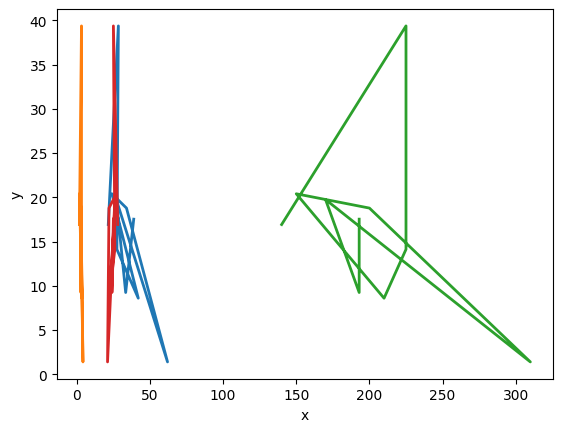

In [428]:
print(X[: 20])
print(y[: 20])
X_prueba = X.copy()
pyplot.plot(X[:10,0:4],y[:10], lw=2)
pyplot.xlabel('x')
pyplot.ylabel('y')

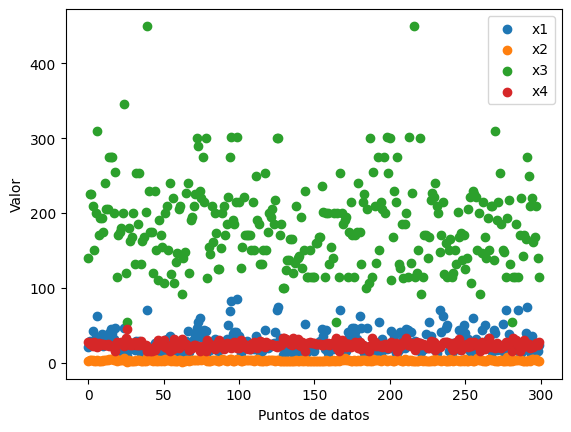

In [429]:
x_labels = ['x1', 'x2', 'x3', 'x4']  # Etiquetas para cada variable x

# Recorremos cada variable x y trazamos un gráfico de dispersión individual
for i in range(4):
    pyplot.scatter(range(300), X[:300, i], label=x_labels[i])

# Configuración del gráfico
pyplot.xlabel('Puntos de datos')
pyplot.ylabel('Valor')
pyplot.legend()

# Mostrar el gráfico
pyplot.show()

## 2 Regresión lineal con multiples variables

Se implementa la regresion lineal multivariable para predecir el precio de las casas. El archivo `Datasets/ex1data2.txt` contiene un conjunto de entrenamiento de precios de casas en Portland, Oregon. La primera columna es el tamaño de la casa en metros cuadrados, la segunda columna es el numero de cuartos, y la tercera columna es el precio de la casa. 

<a id="section4"></a>
### 2.1 Normalización de caracteristicas

Al visualizar los datos se puede observar que las caracteristicas tienen diferentes magnitudes, por lo cual se debe transformar cada valor en una escala de valores similares, esto con el fin de que el descenso por el gradiente pueda converger mas rapidamente.

La desviación estándar es una forma de medir cuánta variación hay en el rango de valores de una característica en particular (la mayoría de los puntos caeran en un rango de ± 2 en relación a la desviaciones estándar de la media); esta es una alternativa a tomar el rango de valores (max-min). En `numpy`, se puede usar la función `std` para calcular la desviacion estandar. 

Por ejemplo, la caracteristica`X[:, 0]` contiene todos los valores de $x_1$ (tamaño de las casas) en el conjunto de entrenamiento, entonces `np.std(X[:, 0])` calcula la desviacion estandar de los tamaños de las casas.
En el momento en que se llama a la función `featureNormalize`, la columna adicional de unos correspondiente a $ x_0 = 1 $ aún no se ha agregado a $ X $. 

<div class="alert alert-block alert-warning">
**Notas para la implementación:** Cuando se normalize una caracteristica, es importante almacenar los valores usados para la normalización - el valor de la media y el valor de la desviación estandar usado para los calculos. Despues de aprender los parametros del modelo, se deseara predecir los precios de casas que no se han visto antes. Dado un nuevo valor de x (area del living room y el numero de dormitorios), primero se debe normalizar x usando la media y la desviacion estandar que se empleo anteriormente en el conjunto de entrenamiento para entrenar el modelo.
</div>
<a id="featureNormalize"></a>

In [430]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[0])
    sigma = np.zeros(X.shape[0])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma
    
    return X_norm, mu, sigma

In [431]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

[[ 21.5          1.8        140.          28.        ]
 [ 28.4          3.2        225.          25.        ]
 [ 27.39075484   3.2        225.          26.        ]
 ...
 [ 19.46         1.8        168.          23.        ]
 [ 12.885        1.8        195.          23.        ]
 [ 42.66         2.4        205.          27.        ]]
Media calculada: [ 27.67343443   3.06186855 185.83966533  23.87348474]
Desviación estandar calculada: [14.39139814  1.03736349 56.73671689  4.2159623 ]
[[-0.42896697 -1.2164189  -0.80793652  0.97878372]
 [ 0.0504861   0.13315626  0.6902115   0.2672024 ]
 [-0.01964226  0.13315626  0.6902115   0.50439618]
 ...
 [-0.57071831 -1.2164189  -0.31442893 -0.20718514]
 [-1.02758844 -1.2164189   0.16145338 -0.20718514]
 [ 1.04135578 -0.63802954  0.33770609  0.74158995]]


Despues de `featureNormalize` la funcion es provada, se añade el temino de interseccion a `X_norm`:

In [432]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [433]:
print(X)

[[ 1.         -0.42896697 -1.2164189  -0.80793652  0.97878372]
 [ 1.          0.0504861   0.13315626  0.6902115   0.2672024 ]
 [ 1.         -0.01964226  0.13315626  0.6902115   0.50439618]
 ...
 [ 1.         -0.57071831 -1.2164189  -0.31442893 -0.20718514]
 [ 1.         -1.02758844 -1.2164189   0.16145338 -0.20718514]
 [ 1.          1.04135578 -0.63802954  0.33770609  0.74158995]]


<a id="section5"></a>
### 2.2 Descenso por el gradiente

En el ejemplo anterior se implemento el descenso por el gradiente para un problema de regresion univariable. La unica diferencia es que ahora existe una caracteristica adicional en la matriz $X$. La función de hipótesis y la regla de actualización del descenso del gradiente por lotes permanecen sin cambios.

La implementacion de las funciones `computeCostMulti` y `gradientDescentMulti` son similares a la funcion de costo y función de descenso por el gradiente de la regresión lineal multiple es similar al de la regresion lineal multivariable. Es importante garantizar que el codigo soporte cualquier numero de caracteristicas y esten bien vectorizadas.

Se puede utilizar `shape`, propiedad de los arrays `numpy`, para identificar cuantas caracteristicas estan consideradas en el dataset.

<div class="alert alert-block alert-warning">
**Nota de implementación:** En el caso de multivariables, la función de costo puede se escrita considerando la forma vectorizada de la siguiente manera:

$$ J(\theta) = \frac{1}{2m}(X\theta - \vec{y})^T(X\theta - \vec{y}) $$

donde:

$$ X = \begin{pmatrix}
          - (x^{(1)})^T - \\
          - (x^{(2)})^T - \\
          \vdots \\
          - (x^{(m)})^T - \\ \\
        \end{pmatrix} \qquad \mathbf{y} = \begin{bmatrix} y^{(1)} \\ y^{(2)} \\ \vdots \\ y^{(m)} \\\end{bmatrix}$$

La version vectorizada es eficiente cuando se trabaja con herramientas de calculo numericos computacional como `numpy`. 
</div>

<a id="computeCostMulti"></a>

In [434]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento
    
    J = 0
    
    h = np.dot(X, theta)
    
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    
    return J


In [435]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    
    # Inicializa algunos valores 
    m = y.shape[0] # numero de ejemplos de entrenamiento
    
    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    
    J_history = []
    
    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))
    
    return theta, J_history

#### 3.2.1 Seleccionando coheficientes de aprendizaje


In [436]:
#X_array = X[1].copy()
#X_array

theta calculado por el descenso por el gradiente: [0.47951065 0.09147088 0.73712013 0.07593486 1.40028107]
ventas de automoviles (usando el descenso por el gradiente):  37.602211522373416
Error Porcentual: 4.52%
Venta Real Y real : 39.384


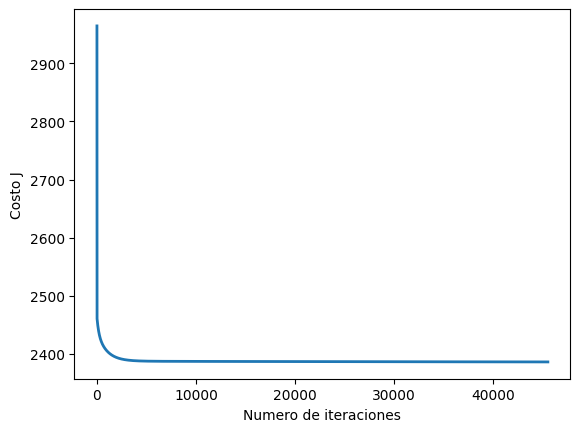

In [446]:
# Elegir algun valor para alpha (probar varias alternativas)



alpha = 0.00001 # alpha = 0.003 0.00001
num_iters = 45500  # 50000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(5)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))
dato = 1
X_array = np.insert(X_prueba[dato].copy(), 0, 1)
#X_array = [1,22.368,3,194,22]
X_array[0:4] = (X_array[0:4] - mu) / sigma

venta = np.dot(X_array, theta)   # Se debe cambiar esto

print('ventas de automoviles (usando el descenso por el gradiente): ', venta)
print('Error Porcentual: {:.2f}%'.format((y[dato]-venta)/y[dato] * 100))
print('Venta Real Y real :', y[dato])

#import matplotlib.pyplot as plt



In [438]:

print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

theta calculado por el descenso por el gradiente: [ 2.39054729 -0.01106226 -0.04939029  0.05480228  0.02843578]


In [439]:
dato = 5
X_array = np.insert(X_prueba[dato].copy(), 0, 1)
X_array[0:4] = (X_array[0:4] - mu) / sigma
venta = np.dot(X_array, theta)
print(venta)
print(y[dato])

-1.6857425355776154
18.78


In [440]:
X_array[0:3]

array([-1.85342898, 29.77561074, -3.22612367])

<a id="section7"></a>
### 2.3 Ecuacion de la Normal

Una manera de calcular rapidamente el modelo de una regresion lineal es:

$$ \theta = \left( X^T X\right)^{-1} X^T\vec{y}$$

Utilizando esta formula no requiere que se escale ninguna caracteristica, y se obtendra una solucion exacta con un solo calculo: no hay “bucles de convergencia” como en el descenso por el gradiente. 

Primero se recargan los datos para garantizar que las variables no esten modificadas. Recordar que no es necesario escalar las caracteristicas, se debe agregar la columna de unos a la matriz $X$ para tener el termino de intersección($\theta_0$). 

In [441]:
#data =pd.read_csv('/content/drive/MyDrive/datasets/Car.csv')

In [442]:
#data = data.to_numpy()

In [443]:
# Cargar datos
#data = np.loadtxt(os.path.join('/content/drive/MyDrive/datasets/Car.csv'), delimiter=',')

X = data[:10000,0:4]
y = data[:10000, 4]
m = y.size
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [444]:
def normalEqn(X, y):
  
    theta = np.zeros(X.shape[1])
    
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
    
    return theta

In [445]:
# Calcula los parametros con la ecuación de la normal
theta = normalEqn(X, y);

# Muestra los resultados optenidos a partir de la aplicación de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)));
dato1 = 7
X_array = np.insert(X_prueba[dato1].copy(), 0, 1)
ventaN = np.dot(X_array, theta) 

print('ventas de automoviles mejor: ',ventaN)
print('Error Porcentual VentaN y Y real: {:.2f}%'.format((y[dato1]-ventaN)/y[dato1] * 100))
print('Diferencia Porcentual entre VentaR y VentaN: {:.2f}%'.format(((venta-ventaN)/venta) * 100))
print('ventas de automoviles mejor decenso gradiente :', venta)
print('Venta Real Y real :', y[dato1])

Theta calculado a partir de la ecuación de la normal: [ 5.05813820e+01 -2.60974387e-02 -1.10914723e+00  2.19951284e-02
  1.34097964e-01]
ventas de automoviles mejor:  54.329862875558696
Error Porcentual VentaN y Y real: -175.13%
Diferencia Porcentual entre VentaR y VentaN: 3322.90%
ventas de automoviles mejor decenso gradiente : -1.6857425355776154
Venta Real Y real : 19.747
